In [101]:
import nltk   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)   # to show all the columns
#READING THE DATA
df = pd.read_excel('Sent_Analysis_Roberta.xlsx')
df.head(10)

,Unnamed: 0.1,Unnamed: 0,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang,Negative,Neutral,Positive,Roberta_Sentiment
0,0,3,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53,Pp1)c,0,5,a year ago,2022-09-24,5,Best employer ever. Worked there for approxima...,ENG,19.696923,29.049307,51.253772,Positive
1,1,4,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53,*nk1l,0,2,a year ago,2022-09-24,5,better place with very good people everything ...,ENG,0.233895,1.816870,97.949243,Positive
2,2,5,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53,69lOZ,0,3,4 years ago,2022-09-24,5,Nice,ENG,6.603812,35.445267,57.950914,Positive
3,3,475,GVT Transport & Logistics Tilburg,Logistics,51.599276,5.013881,Tilburg,4.0,321,a!eIE,0,18,2 years ago,2022-09-29,5,Nice,ENG,6.603812,35.445267,57.950914,Positive
4,4,1435,Newcorp Logistics B.V.,Trucking company,51.813750,4.527254,Heinenoord,4.1,143,x#kZV,1,1773,5 years ago,2022-09-25,4,Nice,ENG,6.603812,35.445267,57.950914,Positive
5,5,5110,DHL Supply Chain Eindhoven,Shipping company,51.469436,5.426405,Eindhoven,4.2,138,5kIpC,1,26,4 years ago,2022-09-25,5,Nice,ENG,6.603812,35.445267,57.950914,Positive
6,6,5627,DNA United Forwarders Ltd.,Freight forwarding service,51.501804,4.751419,Breda,4.4,81,cIMLn,1,19,a year ago,2022-09-23,5,Nice,ENG,6.603812,35.445267,57.950914,Positive
7,7,6,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53,&7jv4,0,27,3 months ago,2022-09-24,5,Good firm. The staff are very welcoming and f...,NOT_ENG,0.125567,0.613592,99.260831,Positive
8,8,7,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53,K2#6M,1,24,4 months ago,2022-09-24,5,"Top company, and coffee, so recommended\n\n",NOT_ENG,0.254413,4.512698,95.232886,Positive
9,9,8,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53,xJ(Zc,0,1,a year ago,2022-09-24,5,A very neat company with professional people ...,NOT_ENG,18.501078,34.238839,47.260091,Positive


In [102]:
df.tail(10)

,Unnamed: 0.1,Unnamed: 0,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang,Negative,Neutral,Positive,Roberta_Sentiment
5090,5090,7994,Winter Logistics,Logistics service,51.996462,4.226443,Honselersdijk,4.2,91,b8WcA,1,26,4 years ago,2022-09-25,2,Very bad\n\n,NOT_ENG,91.224778,7.894078,0.881135,Negative
5091,5091,8064,Erik Geboers Internationaal Transport,Trucking company,51.586792,4.983010,Tilburg,5.0,2,VkYor,0,10,2 years ago,2022-09-24,5,The superlative of hospitality and knowledge ...,NOT_ENG,0.332439,14.604551,85.063004,Positive
5092,5092,8066,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8,QJ%Ju,1,45,a month ago,2022-09-24,1,They are so unprofessional and untrustworthy… ...,ENG,97.035158,2.643009,0.321820,Negative
5093,5093,8067,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8,vBLI&,0,2,4 weeks ago,2022-09-24,5,What a sweet and wonderful people! Nothing to...,NOT_ENG,0.203370,0.699730,99.096918,Positive
5094,5094,8068,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8,AMDIc,0,1,9 months ago,2022-09-24,1,"Untrustworthy people, they are good at lying....",NOT_ENG,96.031880,3.578836,0.389275,Negative
5095,5095,8069,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8,ivODx,0,2,a year ago,2022-09-24,1,Drives antisocial and overtakes right on the ...,NOT_ENG,87.686825,11.229984,1.083181,Negative
5096,5096,8070,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8,K1S^G,0,17,a year ago,2022-09-24,5,"In a word, toppers! Always think in possibili...",NOT_ENG,0.367624,4.160774,95.471615,Positive
5097,5097,2928,Van Spreuwel Transport,Trucking company,51.475256,5.418606,Eindhoven,2.8,384,r$TOX,1,101,a year ago,2022-09-30,4,First service\n\n,NOT_ENG,13.841115,68.763930,17.394957,Neutral
5098,5098,8071,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8,RP^Ug,1,101,a year ago,2022-09-24,5,First service\n\n,NOT_ENG,13.841115,68.763930,17.394957,Neutral
5099,5099,8076,InTime Logistics & Consulting,Trucking company,52.049578,5.117079,Nieuwegein,4.7,3,wqc@z,1,13,9 months ago,2022-09-22,5,Unique\n\n,NOT_ENG,12.161882,56.976402,30.861709,Neutral


In [103]:
#Reading Linh annotations
df2 = pd.read_csv('Annotations_Linh.csv')
df2.head(10)

,Unnamed: 0,index,level_0,review_EN,sentiment,reviewer
0,0,3,0,Best employer ever. Worked there for approxima...,Positive,Employee
1,1,4,1,better place with very good people everything ...,Positive,Undefined
2,2,5,2,Nice,Positive,Undefined
3,3,6,3,Good firm. The staff are very welcoming and f...,Positive,Undefined
4,4,7,4,"Top company, and coffee, so recommended\r\n\r\n",Positive,Undefined
5,5,8,5,A very neat company with professional people ...,Positive,Client
6,6,9,6,Friendly staff and quickly released\r\n\r\n,Positive,Client
7,7,10,7,"Very pleasant experience, very pleasant and h...",Positive,Client
8,8,11,8,"Code 95 done here via driving school Tilburg,...",Neutral,Undefined
9,9,12,9,Very bad how these people interact with other...,Negative,Undefined


In [104]:
#Reading Katarzyna annotations
#df2 = pd.read_csv('Annotations_Katarzyna.csv')
#df2.head(10)

In [105]:
#Merge df with Katarzyna annotations
merged = pd.merge(df, df2, on = "review_EN" , how = "right")
merged.head(5)     # Not aligning well, needs further work 

,Unnamed: 0.1,Unnamed: 0_x,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang,Negative,Neutral,Positive,Roberta_Sentiment,Unnamed: 0_y,index,level_0,sentiment,reviewer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Best employer ever. Worked there for approxima...,NaN,NaN,NaN,NaN,NaN,0,3,0,Positive,Employee
1,1.0,4.0,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG,0.233895,1.816870,97.949243,Positive,1,4,1,Positive,Undefined
2,2.0,5.0,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,69lOZ,0.0,3.0,4 years ago,2022-09-24,5.0,Nice,ENG,6.603812,35.445267,57.950914,Positive,2,5,2,Positive,Undefined
3,3.0,475.0,GVT Transport & Logistics Tilburg,Logistics,51.599276,5.013881,Tilburg,4.0,321.0,a!eIE,0.0,18.0,2 years ago,2022-09-29,5.0,Nice,ENG,6.603812,35.445267,57.950914,Positive,2,5,2,Positive,Undefined
4,4.0,1435.0,Newcorp Logistics B.V.,Trucking company,51.813750,4.527254,Heinenoord,4.1,143.0,x#kZV,1.0,1773.0,5 years ago,2022-09-25,4.0,Nice,ENG,6.603812,35.445267,57.950914,Positive,2,5,2,Positive,Undefined


In [106]:
df['count'] = 1
total = df.groupby(['name']).count()['count']       #total reviews per company
#total

In [107]:
sortd = total.sort_values(ascending = False)
#sortd

In [108]:
#companies with a total of more than 100 reviews
com100 = ['First Logistics B.V.',                                      
'Van Spreuwel Transport',                                          
'ID Logistics Benelux',                                          
'Claassen Logistics',                                                
'GVT Transport & Logistics Tilburg',                                 
'NUNNER Logistics BV',                                               
'A2 Logistics',                                                     
'Jan de Rijk Logistics HQ',                                          
'XPO Logistics (site Tilburg I)',                                    
'CTG Logistics BV',                                                 
'Schenker Logistics Netherlands',                                   
'Transport J.A. van Wanrooy BV',                                     
'Hartog Logistics B.V.',                                             
'De Graaf Logistics BV']

In [114]:
#Average of positive, neutral, negative as %
frequencies = 100*df.groupby(['name','Roberta_Sentiment']).count()['count']/total   #output is a series
#changing the series into a dataframe
dframe = frequencies.to_frame().reset_index()
#dframe
select_comp =  dframe[dframe['name'].isin(com100)]     #selecting the ones in the companoes with at least a 100 reviews
select_comp.head(10)

,name,Roberta_Sentiment,count
8,A2 Logistics,Negative,8.783784
9,A2 Logistics,Neutral,43.243243
10,A2 Logistics,Positive,47.972973
69,CTG Logistics BV,Negative,26.229508
70,CTG Logistics BV,Neutral,45.081967
71,CTG Logistics BV,Positive,28.688525
83,Claassen Logistics,Negative,8.095238
84,Claassen Logistics,Neutral,28.095238
85,Claassen Logistics,Positive,63.809524
100,De Graaf Logistics BV,Negative,13.861386


Text(0.5, 1.0, 'Company Performance Review Trends')

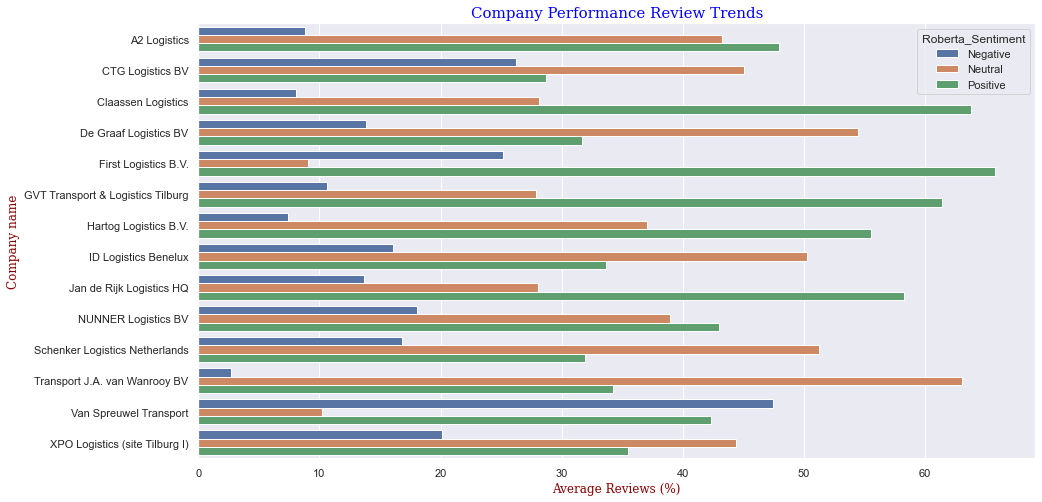

In [120]:
font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':12}


fig = plt.figure(figsize =(15,8))
sns.barplot(x ='count', y ='name',  data = select_comp,
              hue ='Roberta_Sentiment', orient='h')

plt.xlabel("Average Reviews (%)",fontdict = font2)
plt.ylabel("Company name", fontdict = font2)
plt.title("Company Performance Review Trends", fontdict = font1)

Text(0.5, 1.0, ' Reviewer Sentiments')

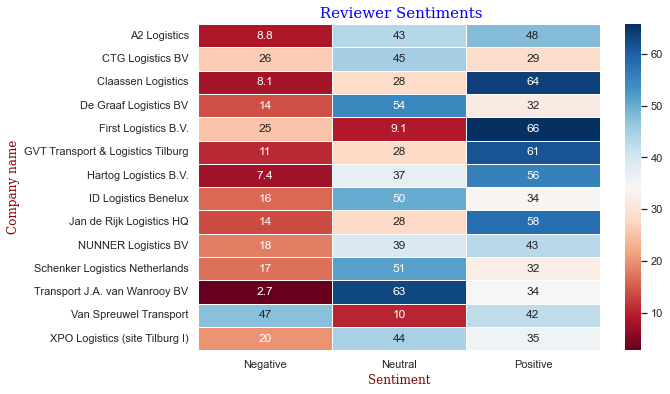

In [121]:
#HeatMap
sns.set_theme()

colmns = select_comp.pivot("name", "Roberta_Sentiment", "count")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(colmns, linewidths=.5, cmap='RdBu', annot = True)          #YlGnBu=YellowGreenBlue  #coolwarm  #RdBu-red-blue
plt.xlabel("Sentiment",fontdict = font2)
plt.ylabel("Company name",fontdict = font2)
plt.title(" Reviewer Sentiments",fontdict = font1)

In [125]:
# Positive sentiment

positive = df[df["Roberta_Sentiment"] == "Positive"]   #selecting only rows with positive sentiment responses
positive.head()
#average of positive as %
avrg = 100*positive.groupby(['name','Roberta_Sentiment', 'lat','lon']).count()['count']/total   #output is a series
#changing the series into a dataframe
davrg = avrg.to_frame().reset_index()
#dframe
selectavrg =  davrg[davrg['name'].isin(com100)]   #selecting the ones in the companises with at least a 100 reviews
selectavrg.head(10)


,name,Roberta_Sentiment,lat,lon,count
4,A2 Logistics,Positive,51.696315,5.277606,47.972973
30,CTG Logistics BV,Positive,51.892067,4.372883,28.688525
36,Claassen Logistics,Positive,51.604511,4.989323,63.809524
44,De Graaf Logistics BV,Positive,51.670868,4.836643,31.683168
61,First Logistics B.V.,Positive,52.048720,5.114827,65.789474
65,GVT Transport & Logistics Tilburg,Positive,51.599276,5.013881,61.421320
69,Hartog Logistics B.V.,Positive,51.674773,4.682740,55.555556
71,ID Logistics Benelux,Positive,51.603441,5.008839,26.066351
72,ID Logistics Benelux,Positive,51.605389,4.987814,7.582938
81,Jan de Rijk Logistics HQ,Positive,51.545446,4.497683,58.273381
